# Finding the Best Markets to Advertise Programming Courses in

Addison 2022-08-16

## Introduction

This project aims to help an e-learning company find the best markets to advertise its programming courses based on a dataset gathered from surveys conducted by freeCodeCamp in 2018. The dataset could be obtained through this link: https://drive.google.com/file/d/1fQZntG5ml5Sq9ozM2DTh3Z8WLVgbYuhM/view?usp=sharing

Those programming courses are written in English and sold at a subscription price of $59 per month.

In [1]:
import pandas as pd
import numpy as np

fcc = pd.read_csv("/Users/apple/Downloads/python_dataquest/Guided Project_ Finding the Best Markets to Advertise In/2017-fCC-New-Coders-Survey-Data.csv", low_memory = 0)

To start with, let's have a quick look at the first few rows as well as essential information of the data to imagine how the data looks like as well as get to know the data types of columns.

In [2]:
fcc.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
fcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


## Finding participants' job role interests

As a part of finding the best markets to advertise its programming courses in, firstly, we need to find out job roles in which survey participants are interested.

Thus, we are about to examine the **JobRoleInterest** column of the dataset from which null values are removed.

In [4]:
jobrole_no_nan = fcc["JobRoleInterest"].dropna()

In [5]:
jobrole_no_nan

1                                 Full-Stack Web Developer
2          Front-End Web Developer, Back-End Web Develo...
3          Front-End Web Developer, Full-Stack Web Deve...
4        Full-Stack Web Developer, Information Security...
6                                 Full-Stack Web Developer
                               ...                        
18161                             Full-Stack Web Developer
18162      Data Scientist, Game Developer,   Quality As...
18163    Back-End Web Developer, Data Engineer,   Data ...
18171      DevOps / SysAdmin,   Mobile Developer,   Pro...
18174    Back-End Web Developer, Data Engineer,   Data ...
Name: JobRoleInterest, Length: 6992, dtype: object

Next, we are going to create a frequency dictionary named **"job_dict"** showing the number of people that are interested in specific job roles.

In [6]:
jobrole_no_nan_list = jobrole_no_nan.astype(str).str.replace(", ",",").str.split(",")

In [7]:
jobrole_no_nan_list

1                               [Full-Stack Web Developer]
2        [  Front-End Web Developer, Back-End Web Devel...
3        [  Front-End Web Developer, Full-Stack Web Dev...
4        [Full-Stack Web Developer, Information Securit...
6                               [Full-Stack Web Developer]
                               ...                        
18161                           [Full-Stack Web Developer]
18162    [  Data Scientist, Game Developer,   Quality A...
18163    [Back-End Web Developer, Data Engineer,   Data...
18171    [  DevOps / SysAdmin,   Mobile Developer,   Pr...
18174    [Back-End Web Developer, Data Engineer,   Data...
Name: JobRoleInterest, Length: 6992, dtype: object

In [8]:
job_dict = {}

for job_list in jobrole_no_nan_list:
    for job in job_list:
        if job in job_dict:
            job_dict[job] +=1
        else:
            job_dict[job] =1
            

In [9]:
job_dict

{'Full-Stack Web Developer': 4198,
 '  Front-End Web Developer': 3533,
 'Back-End Web Developer': 2772,
 '  DevOps / SysAdmin': 927,
 '  Mobile Developer': 2304,
 'Information Security': 1326,
 '  Quality Assurance Engineer': 498,
 'Game Developer': 1628,
 '  User Experience Designer': 1469,
 '  Data Scientist': 1643,
 'Data Engineer': 1248,
 '  Product Manager': 814,
 'Ethical Hacker': 2,
 'security expert': 1,
 'Technical Writer': 1,
 'Researcher': 2,
 'Systems Engineer': 1,
 'Desktop Applications Programmer': 1,
 'Robotics': 1,
 'Non technical ': 1,
 'UI Design': 1,
 'Software engineer ': 1,
 'email coder': 1,
 'Data analyst': 1,
 'I dont yet know': 1,
 'UX developer/designer': 1,
 'support scientific resaerch ': 1,
 'AI and neuroscience': 1,
 'Full Stack Software Engineer': 1,
 'Program Manager': 1,
 'Application Support Analyst': 1,
 "This futurist's dream of using some tech in a way that inspires critical amounts of people to influence the changes we need to protect ": 1,
 'Infor

From the dictionary, it is evident that generally, people are interested in Web Developer and Mobile Developer positions. We will make a graph to illustrate the frequency dictionary as well as confirm our claim.

In [10]:
web_or_mobile = jobrole_no_nan.str.contains("Web Developer|Mobile Developer")

In [11]:
web_or_mobile

1         True
2         True
3         True
4         True
6         True
         ...  
18161     True
18162    False
18163     True
18171     True
18174     True
Name: JobRoleInterest, Length: 6992, dtype: bool

In [12]:
freq_table = web_or_mobile.value_counts(normalize = True)*100

In [13]:
freq_table

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

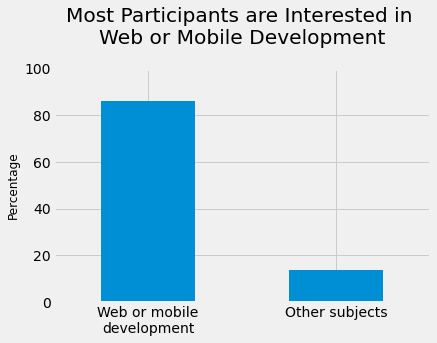

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) 
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subjects'],
           rotation = 0)
plt.ylim([0,100])
plt.show()

From the graph, it is clear that over 80% of the survey participants are interested in web or mobile development positions. People that are interested in other subjects only account for below 20% of all the survey participants.

Next, we will find out the countries that the majority of participants are living in, which might be considered to be the potential markets.

In [15]:
fcc_notnull_job = fcc[fcc["JobRoleInterest"].notnull()].copy()

In [16]:
freq1 = fcc_notnull_job["CountryLive"].value_counts()

In [17]:
freq2 = fcc_notnull_job["CountryLive"].value_counts(normalize = True)*100

In [18]:
pd.DataFrame(data = {"Absolute frequency": freq1, "Percentage": freq2})

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Liberia,1,0.014624
Papua New Guinea,1,0.014624
Guadeloupe,1,0.014624
Gibraltar,1,0.014624


From the table above, it is obvious that participants living in the US significantly outnumber those living in other countries. Concerning these statistics and the fact that the company's programming courses are written in English, we will only examine the first four countries further, which are the US, India, the UK, and Canada.

Next, we will a new column that describes the amount of money a participant has spent on learning programming per month.

This column will be named **"money_per_month"** and be the result of having the values in the column **"MoneyForLearning"** divided by the values in the column **"MonthsProgramming"**.

It is worth mentioning that some respondents reported learning programming for 0 month. They could be those who never learnt programming before or those having learnt programming for under one month. Regardless of any cases, we will replace all the values of 0 with 1 in the **"MoneyForLearning"** column to avoid dividing by 0.

In [19]:
fcc_notnull_job["MonthsProgramming"].replace(0,1, inplace = True)

In [20]:
fcc_notnull_job["money_per_month"] = fcc_notnull_job['MoneyForLearning'] / fcc_notnull_job['MonthsProgramming']

Next, we will retain rows which contain non-null values in the **"money_per_month"** and **"CountryLive"** columns

In [21]:
fcc_notnull_job = fcc_notnull_job[fcc_notnull_job["money_per_month"].notnull()]

In [22]:
fcc_notnull_job = fcc_notnull_job[fcc_notnull_job["CountryLive"].notnull()]

Then, we will group the dataset by the **"CountryLive"** column and find out how much money a participant spends on learning programming average each month in the US, India, the UK, and Canada.

In [23]:
groupped = fcc_notnull_job.groupby("CountryLive").mean()

In [24]:
groupped['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

According to statistics about GDP per Capita by Country in 2022 in worldpopulationreview.com, the GDP per Capita of the US, India, the UK, and Canada are 63.416, 6.461, 44.117, 48.720 (US Dollars). With these numbers, it is surprising to notice that Indians spent more money on learning programming than the British and Canadian although their GPD per Capita is much lower than that of the two latter. 

Now, we will create a box plot to visualize participants' expenditure on programming learning.


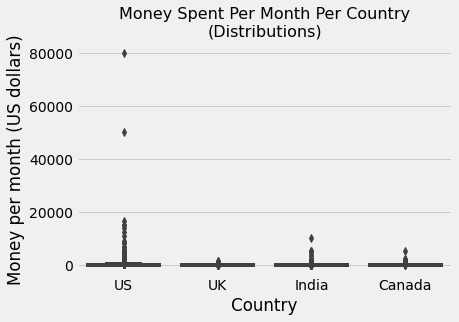

In [25]:
only_4 = fcc_notnull_job[fcc_notnull_job['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
import seaborn as sns

sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 
plt.show()

From the graph above, it is noticeable that there are two participants reporting spending over 50.000 on learning programming, which seems suspicious. Along with these values, we will also remove values above 20.000 since they are suspicious too.

In [26]:
fcc_notnull_job[fcc_notnull_job['money_per_month'] > 20000]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
2478,38.0,1.0,0.0,1.0,NaN,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.0
6835,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000.0
13795,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Michael Thomas,NaN,1.0,30000.0
14024,45.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,80000.0


In [27]:
fcc_notnull_job = fcc_notnull_job[fcc_notnull_job['money_per_month'] < 20000]


Now, we are going to remake the graph.

([<matplotlib.axis.XTick at 0x119d1aaa0>,
 [Text(0, 0, 'US'),
  Text(1, 0, 'UK'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Canada')])

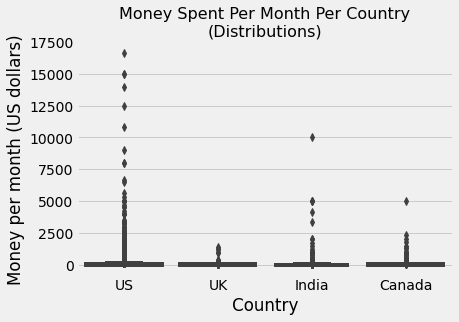

In [28]:
only_4 = fcc_notnull_job[fcc_notnull_job['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])


From this graph, it is suggested that we should examine outliers of the US, India, and Canada to decide whether we should remove those values to improve the accuracy of this analysis.

Firstly, we will inspect data of Indians who reported spending over $2.500 on programming learning per month.

In [29]:
india_outliers = only_4[
    (only_4['CountryLive'] == 'India') & 
    (only_4['money_per_month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


From the table above, it is noticeable that none of the Indians who reported spending over $2.500 on programming learning per month attended a bootcamp, which seems the most sound rational explanation for immense expenditure on programming learning. Thus, we will remove the data of six participants to improve the accuracy of this analysis.

In [30]:
only_4 = only_4.drop(india_outliers.index) # using the row labels

Secondly, we will inspect data of Americans who reported spending over $6.000 on programming learning per month.

In [31]:
us_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


From the table above, it is noticeable that 6 of Americans who reported spending over $6000 on programming learning per month attended a bootcamp, which seems the most sound rational explanation for immense expenditure on programming learning. Thus, we will remove data of the other 5 participants who reported spending over 6000 (US dollars) on programming learning per month but did not attend a bootcamp to improve the accuracy of this analysis.

In [32]:
no_bootcamp = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)
]

only_4 = only_4.drop(no_bootcamp.index)



Thirdly, we will inspect data of Canadians who reported spending over $4.500 on programming learning per month.

In [33]:
canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['money_per_month'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


From the table above, it is noticeable the Canadian who reported spending over $4.500 on programming learning per month attended a bootcamp, which seems the most sound rational explanation for immense expenditure on programming learning. Thus, we will keep these data.

Now, we are going to recalculate the mean expenditure on programming learning for each of the four countries.

In [34]:
only_4.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                      113.510961
India                        65.758763
United Kingdom               45.534443
United States of America    160.532509
Name: money_per_month, dtype: float64

We are also going to replot the graph to visualize the distribution of the mean expenditure on programming learning for each of the four countries.

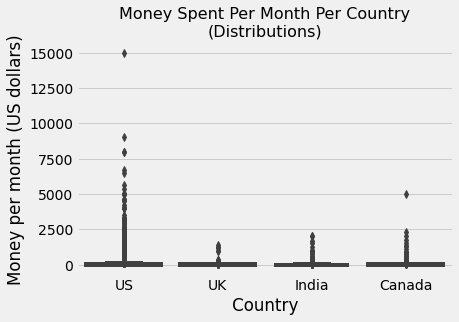

In [35]:
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

In [36]:
only_4['CountryLive'].value_counts(normalize = True) * 100


United States of America    74.987186
India                       11.711943
United Kingdom               7.150179
Canada                       6.150692
Name: CountryLive, dtype: float64

Regarding the subscription price, proportion of participants' nationality as well as the data of participants' spending on programming per month per country, it is suggested that the US is the best market for the company to advertise programming courses. 

While the company should invest the majority of its marketing budget to advertise programming courses in the US, it could also consider using a small portion of its budget to advertise programming courses in Canada and India since these markets are potential as well.
